Este ejemplo muestra, con Keras y Tensorflow, cómo entrenar un modelo definido por nosotros con datos descargados desde la librería Keras.

In [ ]:
! pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 3.8 MB 50.3 MB/s 
     |████████████████████████████████| 132 kB 77.4 MB/s 
     |████████████████████████████████| 14.8 MB 51.7 MB/s 
     |████████████████████████████████| 2.9 MB 58.2 MB/s 
     |████████████████████████████████| 462 kB 74.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68716 sha256=2845c0ef581af59d4ce1211f4d235dd6e2bd83b70d1077994502e5b88270e069
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  A

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta
from tensorflow.keras.callbacks import LearningRateScheduler
import os
import random

Inicializamos con una semilla los generadores de números aleatorios, para hacer replicables los resultados:

In [ ]:
theSEED = 232323
tf.random.set_seed(theSEED)
np.random.seed(theSEED)
random.seed(theSEED)

Decargamos el dataset con la librería Keras:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Cargamos el dataset localmente:

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28)

Vamos a visualizar una de las muestras y la clase a la que pertenece:

9


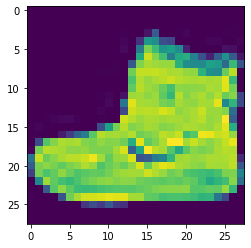

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

Normalizamos las imágenes para que estén entre los valores 0 y 1:

In [ ]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Hiperparámetros: parámetros no optimizables por el algoritmo de retropropagación
# Suelen fijarse mediante ensayo y error y mediante experiencia

NB_EPOCH = 10#100       # numero de epocas de entrenamiento
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

Definiremos un modelo muy simple con una capa Flatten (para convertir la imagen, con forma de matriz, en un array unidimensional) y dos capas Dense, o Fully-Connected.

Compilamos el modelo indicando su optimizador, función de loss y métrica, e iniciamos el entrenamiento.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=VALIDATION_SPLIT)

Epoch 1/10
1500/1500 [==============================] - 10s 4ms/step - loss: 0.6166 - accuracy: 0.7820 - val_loss: 0.4068 - val_accuracy: 0.8494
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3736 - accuracy: 0.8639 - val_loss: 0.3508 - val_accuracy: 0.8714
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3328 - accuracy: 0.8771 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3020 - accuracy: 0.8901 - val_loss: 0.3285 - val_accuracy: 0.8811
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2877 - accuracy: 0.8939 - val_loss: 0.3346 - val_accuracy: 0.8792
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2646 - accuracy: 0.9005 - val_loss: 0.3314 - val_accuracy: 0.8837
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.9015 - val_loss: 0.3261 - val_accuracy

Con el conjunto de test, evaluamos el modelo entrenado:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8804


[0.34409305453300476, 0.8804000020027161]

Con las siguientes gráficas podemos concluir que el modelo entrenado sufre de overfitting:

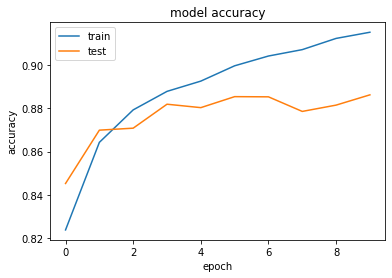

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

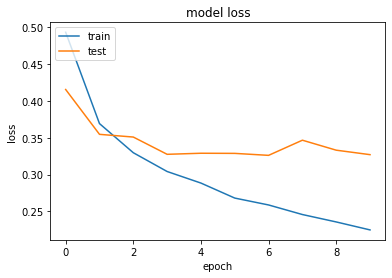

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
OUT_MODEL_PATH= '/content/gdrive/MyDrive/Curso-Jetson/models'
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract1.hdf5'))
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract1'))

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Curso-Jetson/models/model-final-pract1/assets


In [ ]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/models'

model-final-pract1	 model-final-pract2	  model-final-pract3
model-final-pract1.hdf5  model-final-pract2.hdf5  model-final-pract3.hdf5
